# Data Science Technology and Systems PG (11523)
# Final Project | Semester 2, 2025

### Natalia Andrea Cubillos Villegas
### Student ID: U3246979

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

The company Natalia's Airlines has various daily flights arriving and departing from the busiest airports for domestic travel in the US. Unfortunately, the airline has received numerous complaints and negative feedback from customers whose flights were delayed due to poor weather conditions. Therefore, Natalia's Airlines wants to be ahead of these issues related to poor weather conditions and is launching a feature that will let the customer know if the flight will be delayed at the time of purchase. This is a huge advancement for the airline, as a warning or advice will be provided to the customer even before they book. If they decide to proceed with the reservation knowing that the flight will be delayed, it is under their own risk. This will improve the public perception, as negative feedback will decrease, but also will improve the customer experience even before their flight, and their trust and confidence with the airline.

The team aspires toward the improvement of the following business metrics:
1. Fewer customer complaints about delays.
2. Higher customer satisfaction ratings.
3. More bookings because of increased trust in the airline.
4. Reduction in refunds or compensation costs.

### Type of Machine Learning Problem
After analysing the problem to be solved and the data provided, one can conclude that this is a Supervised Machine Learning Problem. The solution of this problem comes from the prediction whether a flight will be delayed because of weather or not, and we are feeding the model with past data from previous flights (delayed and not). Therefore, we confirm that it is supervised learning, and we have the task of classifying the possible results as follows: 
- 1 = flight delayed due to weather
- 0 = flight not delayed due to weather

### Success metrics
In order to improve the business metrics, the team must reduce the number of wrong predictions. Given that we are working with Supervised Machine Learning for Classification, the team needs to track the following model metrics:
1. Accuracy: Percentage of flights correctly predicted as delayed or not delayed.
2. Precision and Recall: This is very important for the “delayed” flights, because if the model misses a delay (false negative), it can affect the trust of the customers.
3. F1 Score: This will provide balance to the model as it combines precision and recall into one number.


### Is Machine Learning a good solution to this problem?
Machine Learning is a good solution considering the dataset size and amount of features being analysed such as flight time, distance, airports, airline, and delays due to weather. It is very hard to consider a model without thinking of machine learning as it would be too hard to make rules manually to cover all of these situations. A machine learning model can learn from the history of flights and find the patterns that humans may not see. With this, we can make predictions for new flights quickly and give the information to customers when they are booking.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [84]:
import os
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [85]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'OneDrive_1_15-10-2025.zip'
base_path = 'Final_Project'
csv_base_path = 'Final_Project/csv_files'

!mkdir -p {csv_base_path}

In [86]:
# How many zip files do we have? write a code to answer it.

# Unzipping the files
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(csv_base_path)

# Counting the number of zip files
zip_files = list(Path(csv_base_path).glob('*.zip'))
num_zip_files = len(zip_files)
num_zip_files

# Printing the result
print(f'The number of zip files is: {num_zip_files}')

The number of zip files is: 60


#### Extract CSV files from ZIP files

In [87]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """
    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_5.zip 
Extracting Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_4.zip 
Extracting Final_Project/csv_files/On_Time_Rep

In [88]:
# How many csv files have we extracted? write a code to answer it.

# Counting the number of csv files
csv_files = list(Path(csv_base_path).glob('*.csv'))
num_csv_files = len(csv_files)

# Printing the result
print(f'The number of csv files is: {num_csv_files}')


The number of csv files is: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [89]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [90]:
# Loading sample data to familiarise with the dataset
df_temp = pd.read_csv('Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

**Question**: Print the row and column length in the dataset, and print the column names.

In [91]:
# Printing the shape of the dataset
df_shape = df_temp.shape
print(f'The dataset has {df_shape[0]} rows and {df_shape[1]} columns.')

# Exploring the columns of the dataset
df_columns = df_temp.columns.tolist()
print('The columns in the dataset are:')
for col in df_columns:
    print(f'- {col}')


The dataset has 585749 rows and 110 columns.
The columns in the dataset are:
- Year
- Quarter
- Month
- DayofMonth
- DayOfWeek
- FlightDate
- Reporting_Airline
- DOT_ID_Reporting_Airline
- IATA_CODE_Reporting_Airline
- Tail_Number
- Flight_Number_Reporting_Airline
- OriginAirportID
- OriginAirportSeqID
- OriginCityMarketID
- Origin
- OriginCityName
- OriginState
- OriginStateFips
- OriginStateName
- OriginWac
- DestAirportID
- DestAirportSeqID
- DestCityMarketID
- Dest
- DestCityName
- DestState
- DestStateFips
- DestStateName
- DestWac
- CRSDepTime
- DepTime
- DepDelay
- DepDelayMinutes
- DepDel15
- DepartureDelayGroups
- DepTimeBlk
- TaxiOut
- WheelsOff
- WheelsOn
- TaxiIn
- CRSArrTime
- ArrTime
- ArrDelay
- ArrDelayMinutes
- ArrDel15
- ArrivalDelayGroups
- ArrTimeBlk
- Cancelled
- CancellationCode
- Diverted
- CRSElapsedTime
- ActualElapsedTime
- AirTime
- Flights
- Distance
- DistanceGroup
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay
- FirstDepTime
-

**Question**: Print the first 10 rows of the dataset.  

In [92]:
# Printing the first 10 rows of the dataset
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [93]:
print(f'The column names are :')
print('----------------------')
for col in df_temp.columns:
    print(col)

The column names are :
----------------------
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [94]:
# Printing all columns in the dataset that contain the word "Del"
for col in df_temp.columns:
    if 'Del' in col:
        print(col)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [95]:
# to answer above questions, complete the following code
print("The number of rows and columns are ", df_shape[0] , " and ", df_shape[1])
print("The years in this dataset are: ", df_temp['Year'].unique())
print("The months covered in this dataset are: ", df_temp['Month'].unique())
print("The date range for data is :" , min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))

The number of rows and columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CA

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [96]:
# Counting the origin and destination airports
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts(), 'Destination': df_temp['Dest'].value_counts()})
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [97]:
# Printing the top 15 busiest origin airports
counts.sort_values(by='Origin',ascending=False).head(15)

# Printing the top 15 busiest destination airports
counts.sort_values(by='Destination',ascending=False).head(15)

,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes, using all the information about a flight such as the date, time, airline, origin, destination, distance, and weather conditions, the team at Natalia's Airlines can try to predict if a flight will be delayed or not. This can be done by training a machine learning model with past flight data that already shows which flights were delayed. The model will learn the patterns that usually cause delays and then use them to make predictions for new flights.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [98]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()
    for file in csv_files:
        print(f'Processing file: {file}')
        temp_df = pd.read_csv(file, usecols=filter_cols)
        for col, vals in zip(subset_cols, subset_vals):
            temp_df = temp_df[temp_df[col].isin(vals)]
        df = pd.concat([df, temp_df], ignore_index=True)
    df.to_csv(file_name, index=False)
    return df

In [99]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [100]:
start = time.time()

combined_csv_filename = f"{base_path}combined_files.csv"

# Call the combine_csv function
df_combined = combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)
print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_2.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_1.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_3.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_1.csv
Processing file: Final_Project/csv_files/On_Time_Reporting_Carrier_On_Time_Performance_(1987

#### Load dataset

Load the combined dataset.

In [101]:
# Reading the combined csv file
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [102]:
# Printing the first 5 rows of the dataset
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,AirTime,Distance,DistanceGroup
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,CA,755,-9.0,0.0,0.0,0.0,0.0,195.0,1464.0,6
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,CA,755,40.0,40.0,1.0,0.0,0.0,199.0,1464.0,6
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,CA,755,9.0,9.0,0.0,0.0,0.0,196.0,1464.0,6
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,CA,755,-16.0,0.0,0.0,0.0,0.0,195.0,1464.0,6
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,CA,755,-8.0,0.0,0.0,0.0,0.0,192.0,1464.0,6


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [103]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [np.int64(2014), np.int64(2017), np.int64(2018), np.int64(2015), np.int64(2016)]
The months covered in this dataset are:  [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA', 'DL', 'WN', 'UA', 'OO']
The Origin airports covered are:  ['DFW', 'SFO', 'DEN', 'PHX', 'IAH', 'ATL', 'ORD', 'LAX', 'CLT']
The Destination airports covered are:  ['SFO', 'DFW', 'DEN', 'PHX', 'ORD', 'IAH', 'ATL', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [104]:
data.rename(columns={'ArrDel15':'is_delay'}, inplace=True)
# Printing the names of the columns after renaming
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup'],
      dtype='object')

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [105]:
# Looking for Null values
data.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [106]:
### Remove null columns
data = data[~data['is_delay'].isnull()]

# Re-checking for Null values
data.isnull().sum()

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
Cancelled            0
Diverted             0
AirTime              0
Distance             0
DistanceGroup        0
dtype: int64

Get the hour of the day in 24-hour time format from CRSDepTime.

In [107]:
# Getting the hour of the day from CRSDepTime in 24-hour format
data['DepHourofDay'] = data['CRSDepTime'] // 100

# Checking the first 5 rows after adding DepHourofDay
data[['CRSDepTime', 'DepHourofDay']].head()

,CRSDepTime,DepHourofDay
0,755,7
1,755,7
2,755,7
3,755,7
4,755,7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

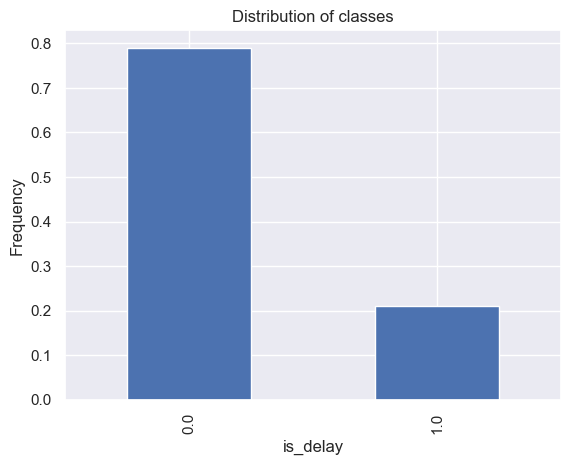

In [108]:
# Checking class delay vs. no delay distribution
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

After analysing the bar plot, one can deduce that only 20% of the flights are delayed.

**Questions**: 

- **Which months have the most delays?** June is the month with most delays, with approximately 28% of flights.

- **What time of the day has the most delays?** The time of the day with most delays is 20:00h, with approximately 35% of flights.

- **What day of the week has the most delays?** The day of the week with most delays is Thursday, with approximately 22% of flights.

- **Which airline has the most delays?** The airline with most delays is WN, with approximately 29% of flights

- **Which origin and destination airports have the most delays?** The origin is ORD and the destination is SFO, with approximately 25% and 29% of flights respectively.

- **Is flight distance a factor in the delays?** After analysing the boxplot, one can conclude that flight distance is not a factor affecting delays, as the average and distribution of distances are very similar between delayed and non-delayed flights.

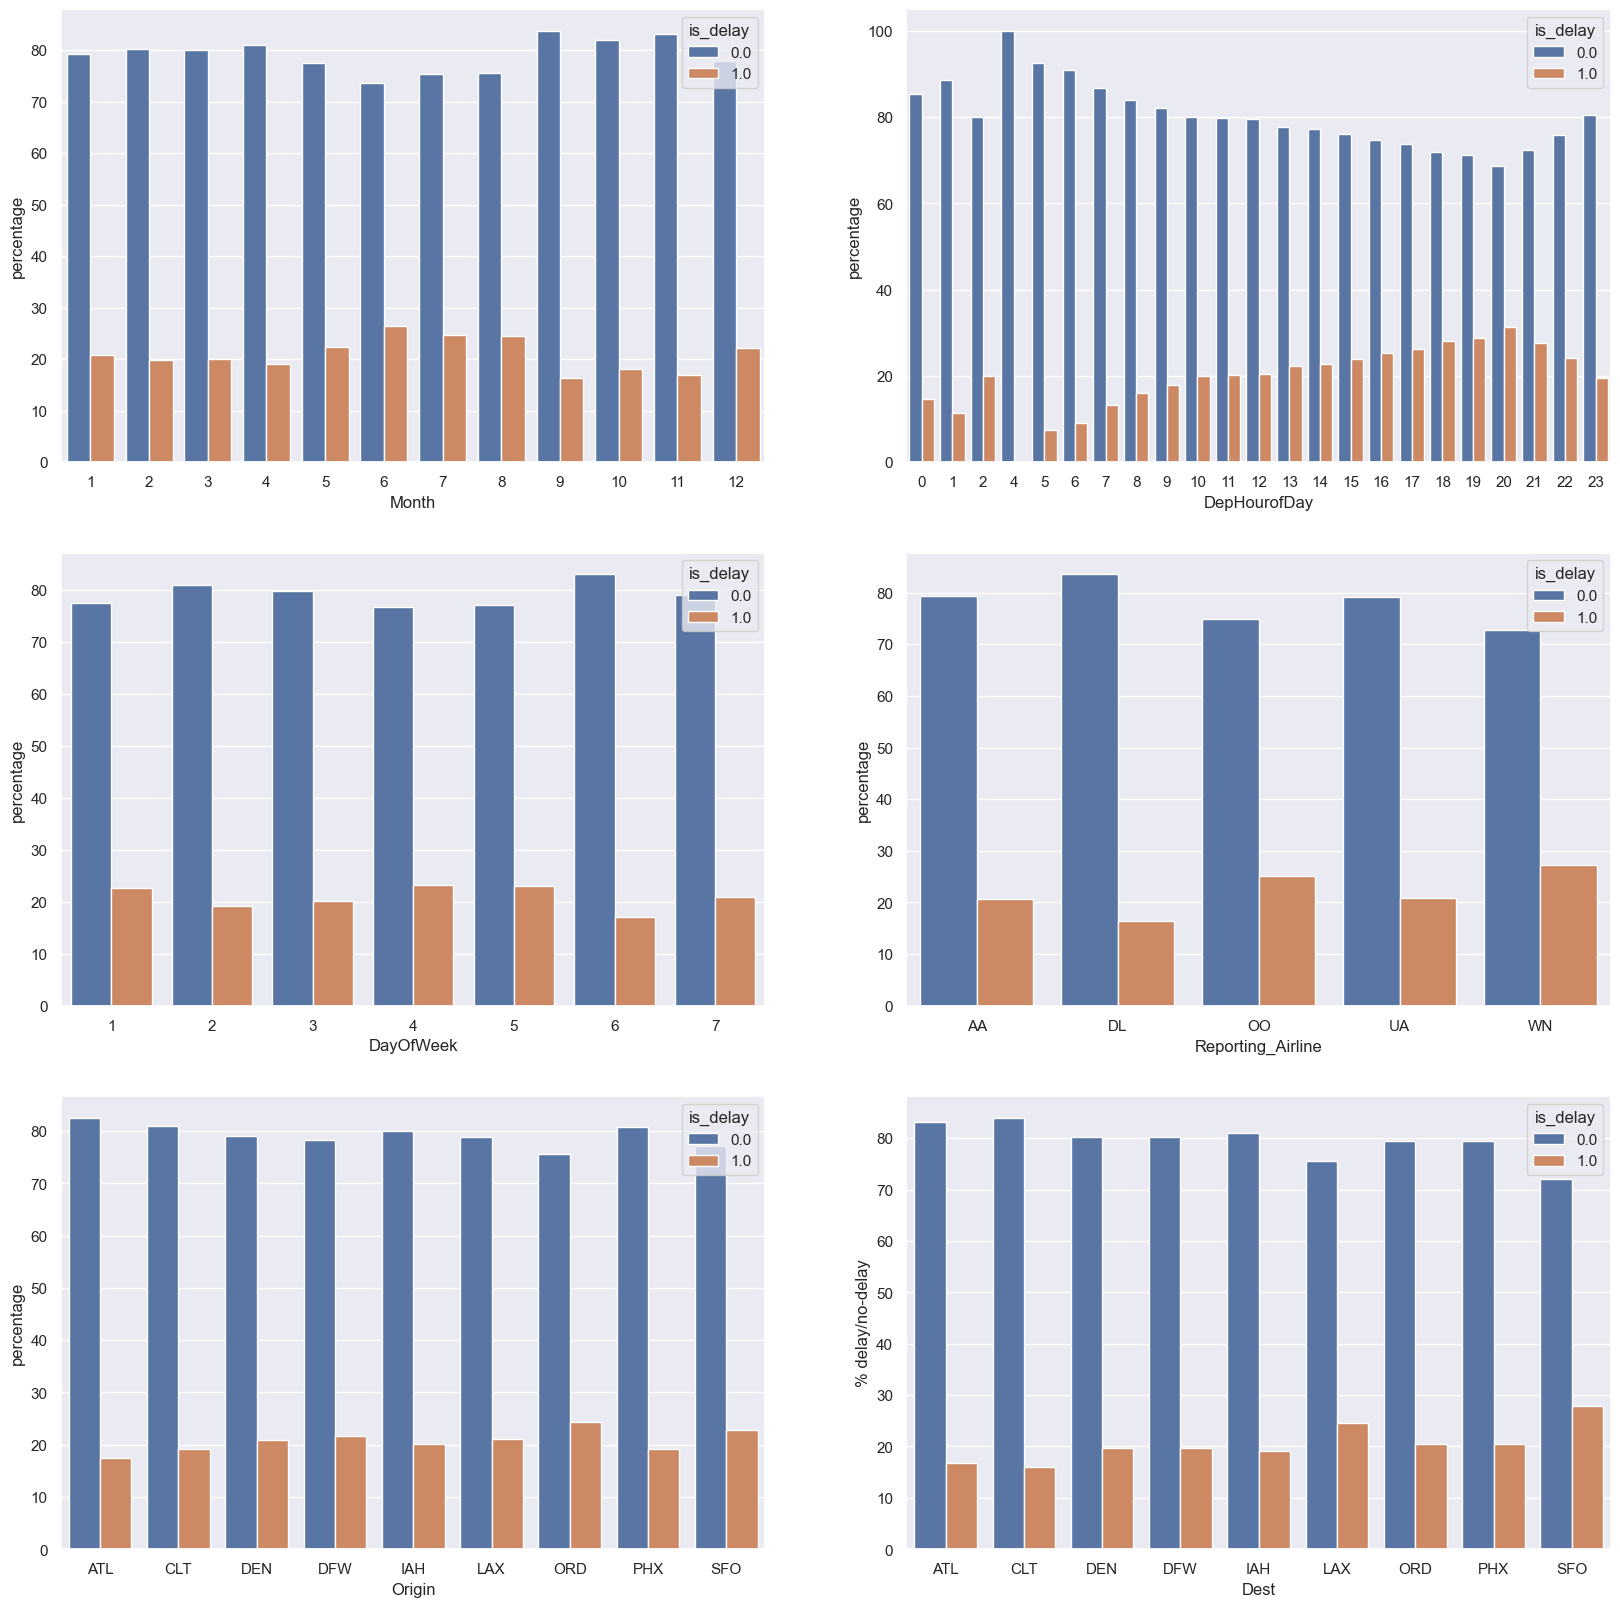

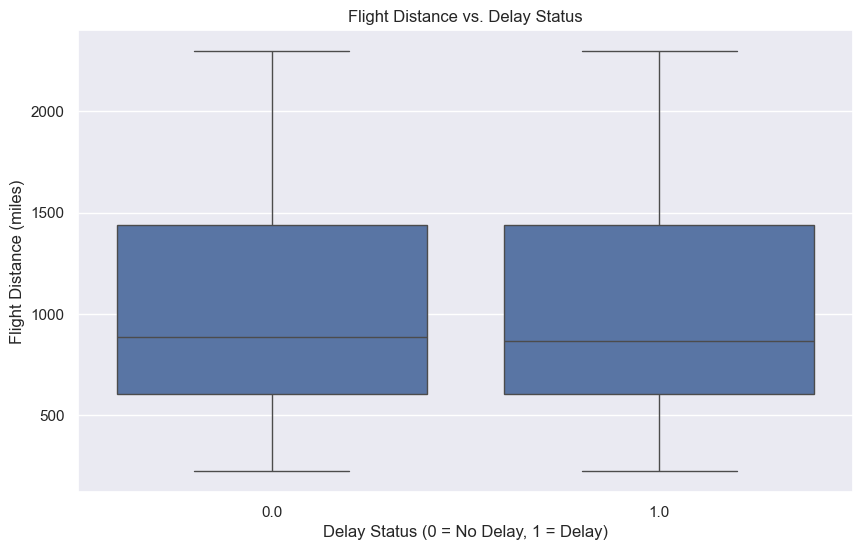

In [109]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    
plt.show()

# Checking if flight distance is a factor in delays
plt.figure(figsize=(10,6))
sns.boxplot(x='is_delay', y='Distance', data=data)
plt.title('Flight Distance vs. Delay Status')
plt.xlabel('Delay Status (0 = No Delay, 1 = Delay)')
plt.ylabel('Flight Distance (miles)')
plt.show()

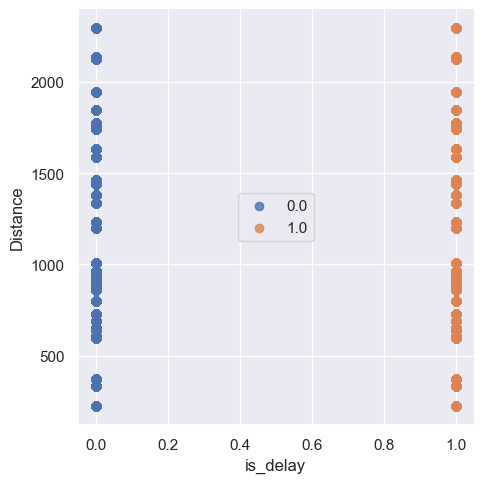

In [110]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

### Features

Look at all the columns and what their specific types are.

In [111]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [112]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
Cancelled            float64
Diverted             float64
AirTime              float64
Distance             float64
DistanceGroup          int64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [113]:
# Filtering relevant columns and converting categorical columns to 'category' dtype
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [114]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [115]:
# Checking the length and columns of the final dataset
print(f'The final dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
print("The columns are: ")
for col in data.columns:
    print(col)

The final dataset has 1635590 rows and 94 columns.
The columns are: 
is_delay
Distance
Quarter_2
Quarter_3
Quarter_4
Month_2
Month_3
Month_4
Month_5
Month_6
Month_7
Month_8
Month_9
Month_10
Month_11
Month_12
DayofMonth_2
DayofMonth_3
DayofMonth_4
DayofMonth_5
DayofMonth_6
DayofMonth_7
DayofMonth_8
DayofMonth_9
DayofMonth_10
DayofMonth_11
DayofMonth_12
DayofMonth_13
DayofMonth_14
DayofMonth_15
DayofMonth_16
DayofMonth_17
DayofMonth_18
DayofMonth_19
DayofMonth_20
DayofMonth_21
DayofMonth_22
DayofMonth_23
DayofMonth_24
DayofMonth_25
DayofMonth_26
DayofMonth_27
DayofMonth_28
DayofMonth_29
DayofMonth_30
DayofMonth_31
DayOfWeek_2
DayOfWeek_3
DayOfWeek_4
DayOfWeek_5
DayOfWeek_6
DayOfWeek_7
Reporting_Airline_DL
Reporting_Airline_OO
Reporting_Airline_UA
Reporting_Airline_WN
Origin_CLT
Origin_DEN
Origin_DFW
Origin_IAH
Origin_LAX
Origin_ORD
Origin_PHX
Origin_SFO
Dest_CLT
Dest_DEN
Dest_DFW
Dest_IAH
Dest_LAX
Dest_ORD
Dest_PHX
Dest_SFO
DepHourofDay_1
DepHourofDay_2
DepHourofDay_4
DepHourofDay_5
DepH

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [116]:
# Renaming the target column for clarity
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [117]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
data.to_csv(f"{base_path}/combined_csv_v1.csv", index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [118]:
# write Code here to split data into train, validate and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42, stratify=train_data['target'])  # 0.25 x 0.8 = 0.2

### Baseline classification model

In [119]:
# Baseline Model - Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [120]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    

In [121]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

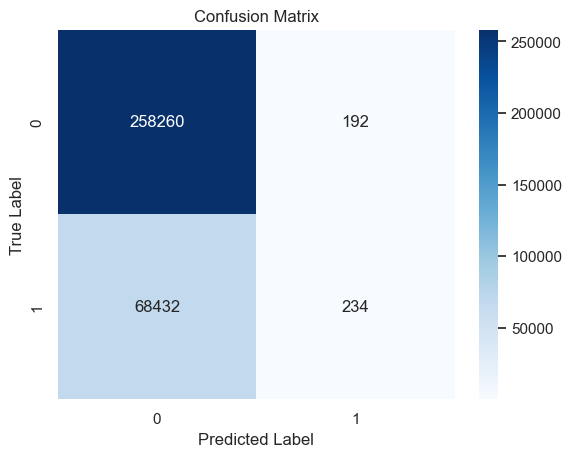

In [122]:
# Plotting the confusion matrix
val_X = val_data.drop('target', axis=1)
val_y = val_data['target']
val_pred = lr_model.predict(val_X)
plot_confusion_matrix(val_y, val_pred)


**Question**: What can you summarize from the confusion matrix?

From the confusion matrix, one can conclude that the model predicts almost all flights as not delayed (class 0). It correctly predicts a large number of no-delay flights, but it failed to identify most of the delayed flights, only 234 predicted correctly, while 68,432 delayed flights were missed. This means the model is biased toward predicting no delays, probably because the dataset is unbalanced, as shown in the distribution of classes only 20% of flights are delayed and most flights are on time.

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

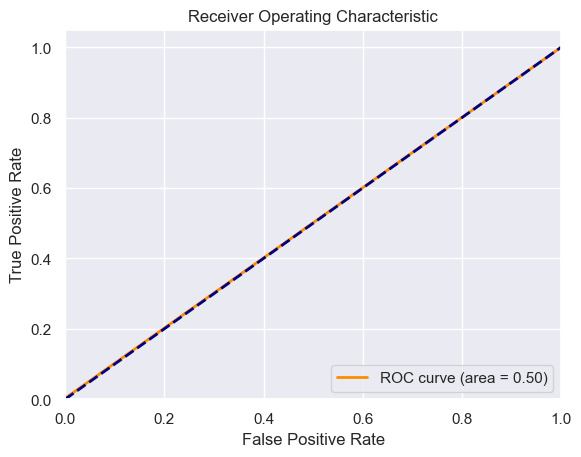

In [123]:
# Plotting ROC Curve
plot_roc(val_y, val_pred)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

In [124]:
# Checking metrics
from sklearn.metrics import classification_report
print(classification_report(val_y, val_pred))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258452
         1.0       0.55      0.00      0.01     68666

    accuracy                           0.79    327118
   macro avg       0.67      0.50      0.44    327118
weighted avg       0.74      0.79      0.70    327118



From the evaluation metrics, one can conclude that the model reached an accuracy of 79%, but this number is misleading because it mainly predicts that flights are not delayed. The recall for the delayed flights (class 1.0) is 0.00, which means the model is not able to detect any of the delayed flights correctly. The precision for delayed flights is also low (0.55), and the F1-score is almost zero. This result shows that the model performs well for non-delayed flights but fails to identify delays. The problem is probably caused by the unbalanced dataset, where most of the flights are on time.

In the next iteration, I plan to handle the class imbalance by using techniques such as oversampling the delayed flights or adjusting the class_weight parameter, so the model can focus more on predicting delays correctly.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


In [125]:
### Provide a link for your GitHub repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

In [126]:
%pip install -q imbalanced-learn

# Feature Engineering and Model Development
# Tackling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f'Original dataset shape: {y_train.value_counts().to_dict()}')
print(f'Resampled dataset shape: {y_resampled.value_counts().to_dict()}')

Note: you may need to restart the kernel to use updated packages.
Original dataset shape: {0.0: 775354, 1.0: 206000}
Resampled dataset shape: {0.0: 775354, 1.0: 775354}


#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [127]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [128]:
# download data from the link above and place it into the data folder
weather = pd.read_csv('daily-summaries-2025-10-24T11-02-12.csv')

# Checking the first 5 rows of the weather data
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [129]:
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [130]:
# Creating a column for MONTH using the Date column
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [131]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [132]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [133]:
weather_impute = weather.groupby(['airport', 'MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,airport,MONTH,TAVG,TMAX,TMIN
0,ATL,01,59.070968,114.600000,8.161290
1,ATL,02,97.212766,152.858156,46.283688


Merge the mean data with the weather data.

In [134]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute, how='left', on=['MONTH', 'airport']).rename(
    columns={
        'TAVG_y': 'TAVG_AVG',
        'TMAX_y': 'TMAX_AVG',
        'TMIN_y': 'TMIN_AVG',
        'TAVG_x': 'TAVG',
        'TMAX_x': 'TMAX',
        'TMIN_x': 'TMIN'
    }
)

Check for missing values again.

In [135]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [136]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [137]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [138]:
sum(data.isna().any())

0

In [139]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [140]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [141]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [142]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [143]:
# Renaming the target column for clarity: 'is_delay' to 'target'
data.rename(columns = {'is_delay':'target'}, inplace=True )

In [144]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv(f"{base_path}/combined_csv_v2.csv", index=False)

Create the training and testing sets again.

In [145]:
# Creating the train, validate, test splits
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42, stratify=train_data['target'])  # 0.25 x 0.8 = 0.2

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [147]:
# Ensure we're using the current feature set (from the latest train_data) for resampling and training.
# Build X_train/y_train from the current train_data (created after the feature-engineering iteration)
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

# Re-run SMOTE on the current X_train/y_train so the sampled features match validation set columns
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_arr, y_resampled_arr = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame so we keep column names and can reindex validation correctly
X_resampled = pd.DataFrame(X_resampled_arr, columns=X_train.columns)
y_resampled = pd.Series(y_resampled_arr, name='target')

# Instantiate and fit the logistic regression on the resampled (and correctly-named) features
classifier2 = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
classifier2.fit(X_resampled, y_resampled)

# Prepare validation set and align its columns to the columns used to fit the model
val_X2 = val_data.drop('target', axis=1)
val_y2 = val_data['target']
# Ensure same column order and add any missing columns (fill with 0)
val_X2 = val_X2.reindex(columns=X_resampled.columns, fill_value=0)

# Predict on validation set
val_pred2 = classifier2.predict(val_X2)
# Predicting probabilities
val_pred_proba2 = classifier2.predict_proba(val_X2)[:, 1]


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

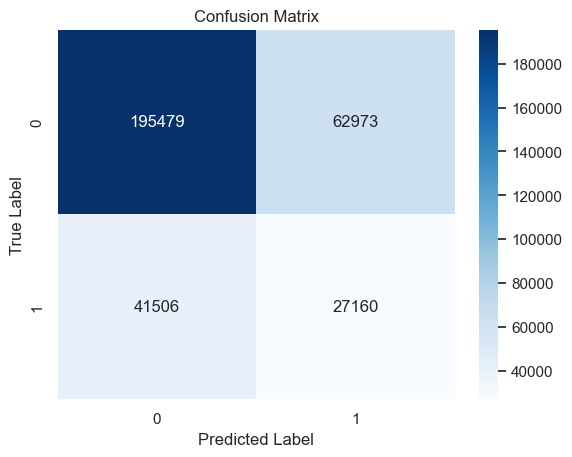

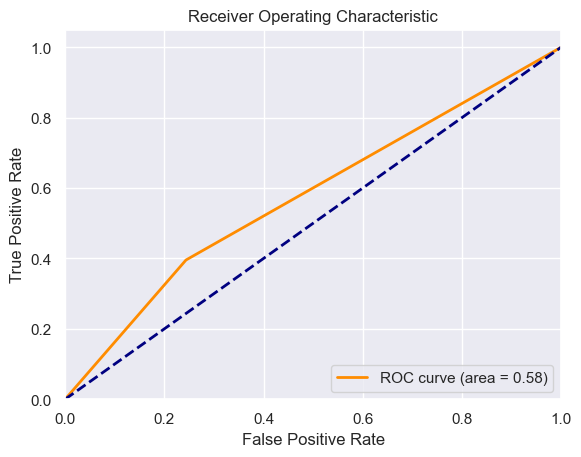

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79    258452
         1.0       0.30      0.40      0.34     68666

    accuracy                           0.68    327118
   macro avg       0.56      0.58      0.57    327118
weighted avg       0.71      0.68      0.70    327118



In [148]:
# Evaluating the model

# Plotting the confusion matrix for the second classifier
plot_confusion_matrix(val_y2, val_pred2)

# Plotting ROC Curve for the second classifier
plot_roc(val_y2, val_pred2)

# Evaluation metrics for the second classifier
print("Classification Report:")
print(classification_report(val_y2, val_pred2))


**Question:** did you notice a difference by adding the extra data on the results?

After adding the extra data and performing feature engineering by balancing the classes, there was significant improvement of the results. The precision of the prediction of the delayed flights decreased by 15% because the model now predicts more delays, including some false positives. This is confirmed after checking the recall results, which increased by 40%. Overall, the accuracy decreased, but this was expected  because the model stopped favoring the majority class (no delays).

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

## LINK: https://public.tableau.com/app/profile/natalia.cubillo/viz/Tableu_Project_U3246979/Dashboard1?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

Throughout this project, applying a supervised machine learning model for classification proved to be a valuable approach. It was demonstrated that predicting flight delays is possible, allowing Natalia’s Airline to offer a better service and build customer trust by informing them in advance if their flight might be delayed.

For this task, a Logistic Regression model was used, as it fits a classification problem. However, in the first iteration, the dataset was highly unbalanced, which caused extremely low precision and recall — the model was not able to correctly identify delayed flights. After applying feature engineering and addressing the data imbalance, the model performance improved significantly. This showed that balancing the data was an effective step, as well as adding new related features.

Even though there was clear improvement, the model performance still doesn’t fully meet the business goal. The accuracy is not high enough to deploy this model publicly because there are still many false negatives — meaning some flights that will be delayed are not being predicted as such. This is critical for the company’s goal, since customers would not be warned about real delays.

If there were more time, I would continue tuning the model, exploring different algorithms (like Random Forest or XGBoost), and adding more weather related or airport specific features to improve precision and recall.

This project helped me better understand how data quality, feature selection, and balancing can deeply impact a model’s performance. It was also a great opportunity to practice interpreting results not just from a technical perspective, but also from a business impact point of view.